# Data analysis

In the previous notebook, all the data that will allow to answer the following questions has been obtained:
- What is the chance of snow on Christmas Day, December 25th?
- What is the chance of snow on that day depending on the region of Poland?
- What was the situation with snow on Christmas over the last 70 years in Poland? 

## First look at the data

After obtaining and cleaning the data, let's check the basic statistics related to the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/snow_data_all_filtered.csv')

In [7]:
# Quick preview of the dataframe 

df.sample(5)

,station_id,station_name,year,snow,t_mean,lon,lat
884,251170150,GRABOWNICA,2006,0,3.3,17.450000,51.466667
7648,251170290,NAMYSŁÓW,1987,0,0.0,17.733333,51.083333
7695,253160090,WIERZCHOWO,1987,0,-0.3,16.116667,53.466667
8319,249200540,HALA GĄSIENICOWA,1991,67,-10.2,20.005833,49.244167
3528,252200150,WARSZAWA-BIELANY,1959,4,1.2,20.966667,52.283333


In [8]:
df['snow'].describe()

count    10060.000000
mean         5.439761
std         11.411134
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max        173.000000
Name: snow, dtype: float64

There are ~10k records in the dataset and the average snow cover for all data is ~5.4 cm. However, the median is 0 cm and the 75th percentile is 6 cm. Let's check the snow cover size distribution on the histogram.

Text(0.5, 0, 'snow cover [cm]')

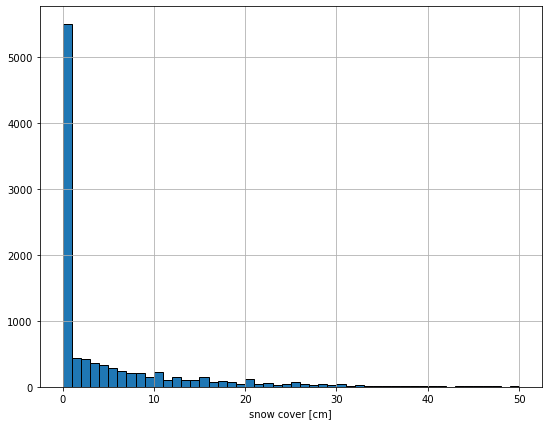

In [17]:
plt.figure(figsize=(9, 7))
ax = df['snow'].hist(bins=50, edgecolor='k', range=[0,50])
ax.set_xlabel('snow cover [cm]')

As the histogram clearly shows, more than half of all snow cover measurements in the entire dataset are 0 cm.
  
Let's check what the average temperature distribution looks like for December 25th.

In [18]:
df['t_mean'].describe()

count    10060.000000
mean        -1.320765
std          5.421824
min        -32.800000
25%         -4.200000
50%         -0.600000
75%          2.300000
max         13.000000
Name: t_mean, dtype: float64

Text(0.5, 0, 'average temperature [*C]')

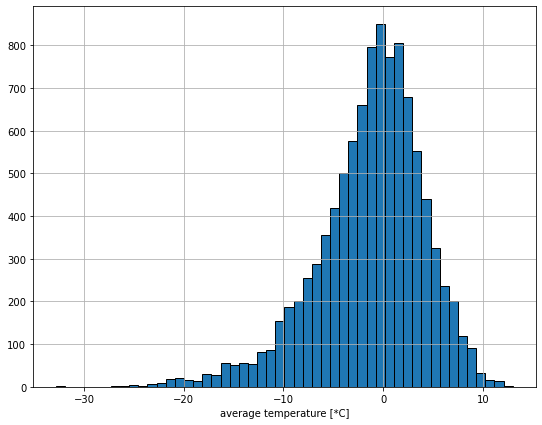

In [21]:
plt.figure(figsize=(9, 7))
ax = df['t_mean'].hist(bins=50, edgecolor='k')
ax.set_xlabel('average temperature [*C]')

In [27]:
# Quick calculation how many records contain the average temperature above zero

df.loc[df['t_mean'] > 0].count()

station_id      4359
station_name    4359
year            4359
snow            4359
t_mean          4359
lon             4359
lat             4359
dtype: int64

The average temperature for the entire dataset is -1.3 *C, and the median is closer to zero and is -0.6 *C. As you can see in the histogram, on this day the air temperature usually oscillates around 0 * C and around 43% of all measurements are above zero.

The above observations apply to the entire dataset. However, the measurements have been carried out for more than 70 years and each winter is different.
Let's check what the average snow cover looked like depending on the year by creating a simple bar plot.

Text(0, 0.5, 'snow cover [cm]')

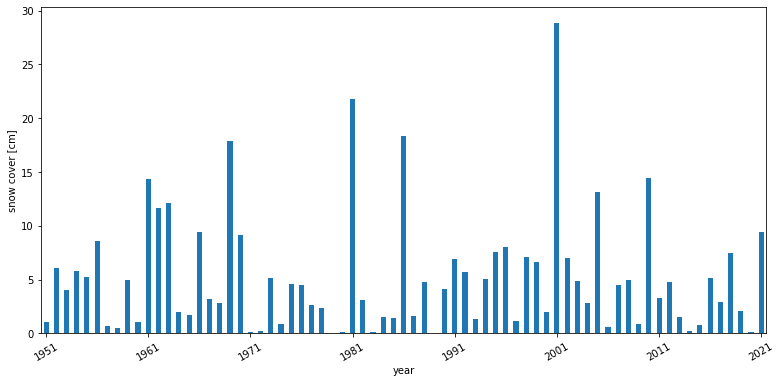

In [42]:
plt.figure(figsize=(13, 6))

ax = df.groupby('year')['snow'].agg('mean').plot.bar(x='year', rot=30)
ticks = ax.xaxis.get_ticklocs()
ax.xaxis.set_ticks(ticks[::10])
ax.set_ylabel('snow cover [cm]')

Creating this chart, we take into account the average snow cover from all stations across the country, which is not very reliable information, but it gives a general overview of ​​what the snow situation was in a given year.

However, based on such general information, some interesting conclusions can be drawn:
- Every year is different and there is no one repeatable pattern. There are years with absolutely no snow and with quite a lot of it.
- Every few years (approx. 5-10 years) we have very snowy Christmas, where the average snow cover for the whole country is 10 cm higher.
- The snowiest Christmas was in 2001, and the last with a lot of snow was recently in 2021.
- Paradoxically, there was the least snow on Christmas in the 70s (4 years without snow) and 80s.

## Weather stations

In addition to numerical data (such as snow cover or temperature), the dataset also includes information on weather stations that have recorded meteorological data over the years. Let's check:
- How many unique stations are in the dataset?
- Whether the number of stations changed depending on the year?
- Were there stations from which there are measurements throughout the 71-year period?
- Where exactly are the stations located in Poland?

In [24]:
# How many unique weather stations are in the dataset?

df['station_id'].nunique()

337

The data set includes data from ***337 weather stations***. Let's see how many stations recorded weather data each year.

Text(0, 0.5, 'number of stations')

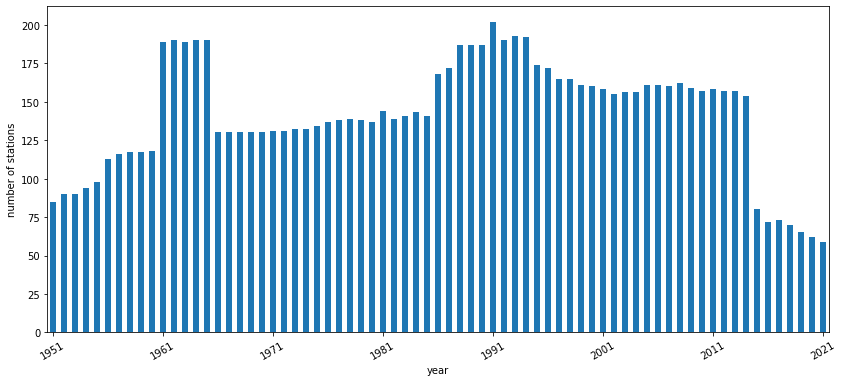

In [47]:
plt.figure(figsize=(14, 6))

ax = df.groupby('year')['station_id'].count().plot.bar(x='year', rot=30)
ticks = ax.xaxis.get_ticklocs()
ax.xaxis.set_ticks(ticks[::10])
ax.set_ylabel('number of stations')

As we might expect, a different number of weather stations provided data each year. Let's check the number of stations from which we have data for the entire period (from 1951 to 2021).

In [48]:
df.groupby('station_name')['year'].agg('count').loc[lambda x: x > 70]

station_name
DYNÓW                   71
KOŁUDA WIELKA           71
KRAKÓW-OBSERWATORIUM    71
LEGIONOWO               71
LIDZBARK WARMIŃSKI      71
PUCZNIEW                71
PUŁAWY                  71
PUŁTUSK                 71
SKIERNIEWICE            71
SZEPIETOWO              71
WARSZAWA-BIELANY        71
Name: year, dtype: int64

It turned out that only ***11 stations*** provided measurements each year.

Let's check where exactly the weather stations are located in Poland. We'll use the Basemap python library to perform that task. 

In [1]:
from mpl_toolkits.basemap import Basemap

In [17]:
# Creating a list of all station names

station_names = df['station_name'].unique()

In [27]:
# Creating a dataframe with station name and geographical coordinates

stations_coord = df.loc[df['station_name'].isin(station_names)][['station_name','lat','lon']].drop_duplicates(subset=['station_name'], keep = 'first')
stations_coord.sample(5)

,station_name,lat,lon
2765,OLSZTYN,53.771111,20.422778
3844,SZCZUCZYN,53.566667,22.283333
7479,BEŁCHATÓW,51.400000,19.366667
84,JAROCIN,50.566667,22.300000
589,WARSZAWA-FILTRY,52.219444,20.999167


In [29]:
# Converting latitude and longitude data into a numpy array

import numpy as np

lons_stations = np.array(stations_coord['lon'])
lats_stations = np.array(stations_coord['lat'])

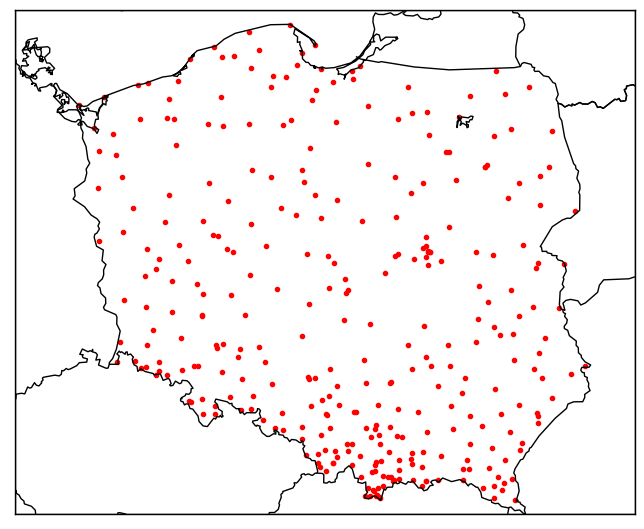

In [33]:
fig, ax = plt.subplots(figsize=(8,8))

m = Basemap(projection='merc',
            resolution='i',llcrnrlat=49,urcrnrlat=55,llcrnrlon=13,urcrnrlon=25)

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 

lonsm, latsm = m(lons_stations, lats_stations)

m.scatter(lonsm, latsm, marker = '.', color='r')

plt.show()

As shown on the map, weather stations form a dense network throughout Poland. Thanks to this, we have data on the occurrence of snow in every region of the country

## Calculating the snow occurence ratio

The main purpose of this analysis is to check, based on historical meteorological data, what is the chance of snow on Christmas Day in Poland. 

For this we need to create a new dataframe with snowy years counted for each weather station. For the purposes of this analysis, we assume that snowy Christmas are when there is ***at least 2 cm*** of snow cover. Next, we need to create a new column where all snow years will be divided by the total number of years when measurements have been taken for a particular station.

In [3]:
# Creating the Series with station names
station_name = df.groupby('station_id').first()['station_name']

# Creating the Series with number of total years of measurements
total_years = df.groupby('station_id')['station_name'].count()

# Creating the Series with all snowy years counted (with snow cover of at least 2 cm)
snowy_years = df.groupby('station_id').apply(lambda x: x[x['snow'] >= 2 ]['year'].count())

# Creating the Series with calculated snow occurrence ratio (simply dividing number of snowy years by number of total years for each station)
snow_occurr = snowy_years / total_years

In [4]:
# Merging all Series into one final dataframe

snow_total = pd.concat({"station_name":station_name,"total_years":total_years,"snowy_years":snowy_years,"snow_occurr":snow_occurr}, axis=1)
snow_total.sort_values(by='snow_occurr', ascending=False).head(10)

,station_name,total_years,snowy_years,snow_occurr
station_id,,,,
249200550,DOLINA PIĘCIU STAWÓW,31,31,1.000000
249190140,LESKOWIEC,5,5,1.000000
249229989,ŻUBRACZE,7,7,1.000000
349190650,KASPROWY WIERCH,15,15,1.000000
250150170,JAKUSZYCE,21,20,0.952381
350150510,ŚNIEŻKA,15,14,0.933333
249200540,HALA GĄSIENICOWA,28,26,0.928571
249190320,LUBOŃ WIELKI,10,9,0.900000
249180260,ISTEBNA-KUBALONKA,28,25,0.892857


Above is a table with stations ranked by the frequency of snow on Christmas. At the very top, of course, we will find stations located in the mountains, where there is almost always snow during this period.

Let's check the snow occurrence ratio for weather stations with the highest number of total years.

In [5]:
snow_total.sort_values(by='total_years', ascending=False).head(25)

,station_name,total_years,snowy_years,snow_occurr
station_id,,,,
252220030,SZEPIETOWO,71,26,0.366197
251210120,PUŁAWY,71,23,0.323944
251190050,PUCZNIEW,71,18,0.253521
252180080,KOŁUDA WIELKA,71,20,0.281690
252200120,LEGIONOWO,71,22,0.309859
252200150,WARSZAWA-BIELANY,71,23,0.323944
252210050,PUŁTUSK,71,22,0.309859
251200030,SKIERNIEWICE,71,14,0.197183
250190390,KRAKÓW-OBSERWATORIUM,71,26,0.366197


In the table above, we have a list of 25 stations ranked in terms of the total number of years in which measurements were carried out. For most places, the snow occurence ratio is in the range of 0.2-0.4, which means that snow occurs on average ***every 3-5 years*** for Christmas.

Weather stations are located in different parts of Poland and the snow occurence ratio will probably not be the same everywhere. It is best to visualize such data on a map, which will be done in the next notebook.